In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 


In [3]:
df = pd.read_csv("../input/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [392]:
lf[lf.FireplaceQu.isnull()]

,Id,SalePrice,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold


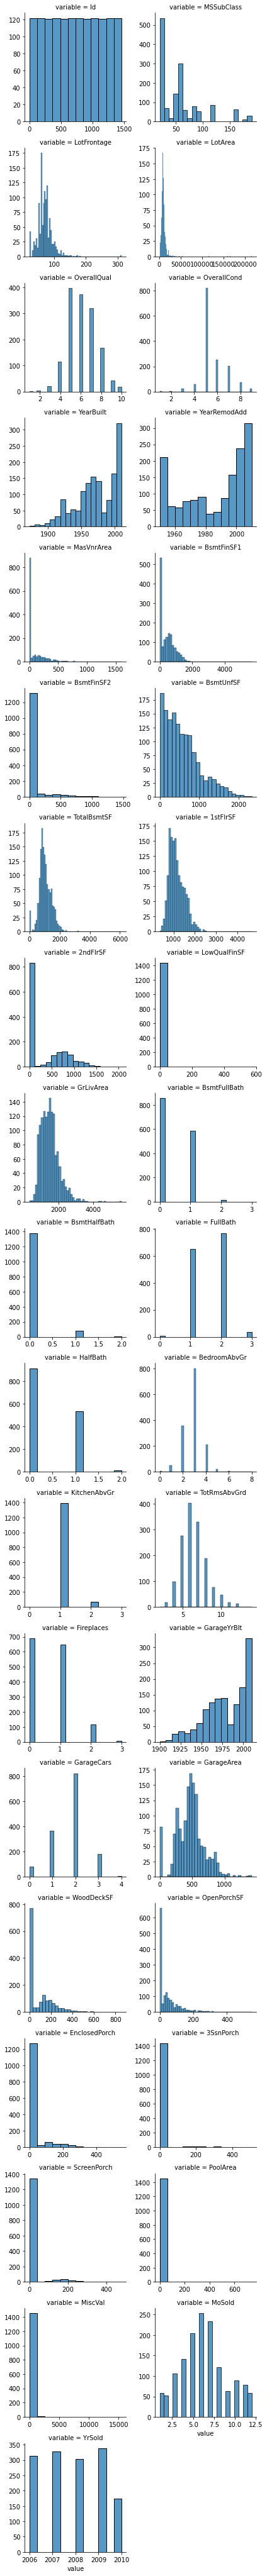

In [375]:
f = pd.melt(df, id_vars=['SalePrice'], value_vars=df.iloc[:,:-1].select_dtypes(include=["int","float64"]).columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, "value") # count for each value, new graph for each variable

In [280]:
qualitative = df.select_dtypes("object").columns

In [281]:
import scipy.stats as stats

In [394]:
df = df.fillna("None") #can not merge on na, but na is a category

In [389]:
#df.Id = df["Id"].astype("object")

In [390]:
#when encoding the categorical objects, groupby mean of sale price so then 1 < 2, the categorical that are already ints are already ordered.
#SO freakin awesome
#strong negative correlations are still good for models because models use impurities or similarity scores that do not have predetermined yes or no or values
catDf = df[list(df.select_dtypes("object").columns) + ["Id","SalePrice"]]
#catDf.loc[:,("SalePrice")] = df["SalePrice"]
for x in df.select_dtypes("object").columns:
    kf = df.groupby(x)["SalePrice"].mean().to_frame().sort_values("SalePrice")
    kf = kf.reset_index().reset_index().rename(columns={"index":x+"Encoded"}).drop(columns=["SalePrice"])
    catDf = catDf.merge(kf, on=x)
catDf = catDf[[x for x in catDf.columns if "Encode" in x or x in ["SalePrice","Id"]]]
catDf.columns = [x.split("Encoded")[0] for x in catDf.columns]
#lf = lf = pd.concat([df.select_dtypes(include=['float64',"int64"]),catDf.sort_values('Id')],axis=1)




In [391]:
lf = catDf.merge(df.select_dtypes(include=['float64',"int64"]), on=["Id","SalePrice"])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


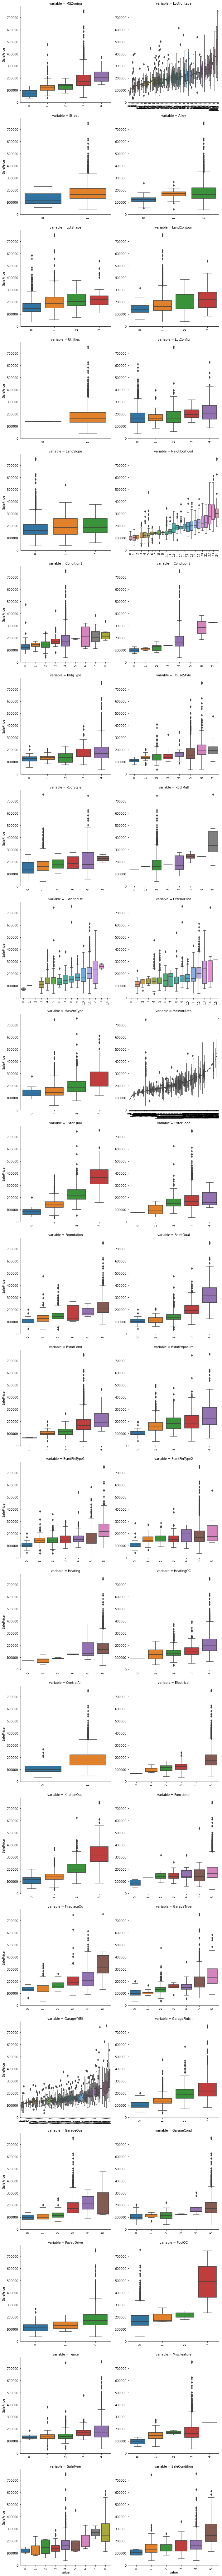

In [365]:
def boxplot(x, y, **kwargs):
    #print(pd.DataFrame({"x":x,"y":y}).groupby("x")["y"].mean().to_frame())
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(lf, id_vars=['SalePrice'], value_vars=catDf.iloc[:,2:].columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [348]:
matrix = correlation_matrix.loc[["SalePrice"]]
matrix

,Id,SalePrice,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
SalePrice,-0.02,1.0,0.32,0.54,0.04,0.14,0.27,0.16,0.01,0.12,...,0.62,0.32,0.32,-0.13,0.04,0.11,0.09,-0.02,0.05,-0.03


In [384]:
lf["FireplaceQu"].value_counts()

1    690
4    380
3    313
2     33
5     24
0     20
Name: FireplaceQu, dtype: int64

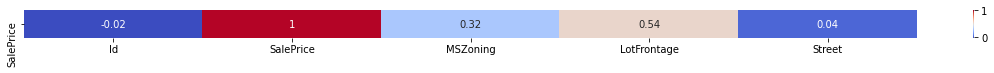

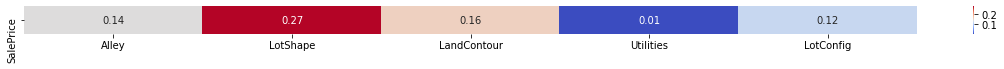

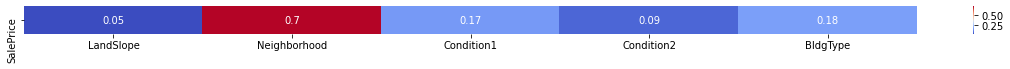

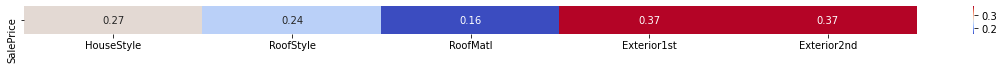

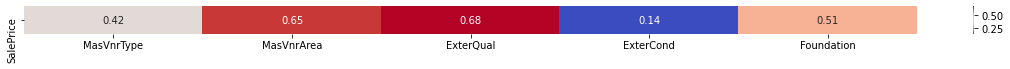

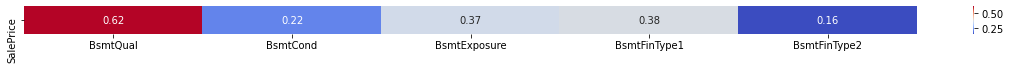

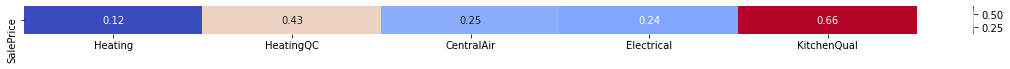

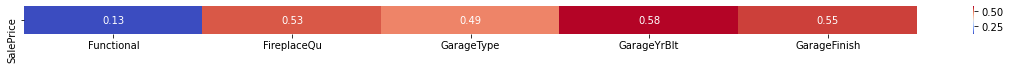

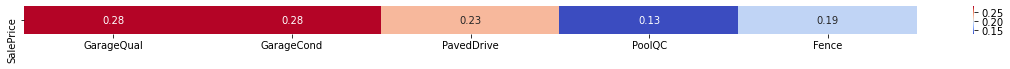

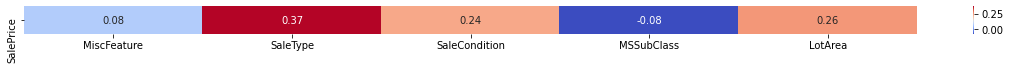

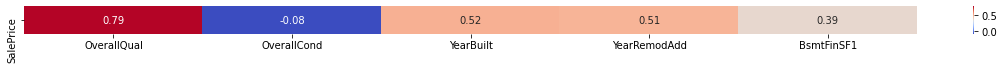

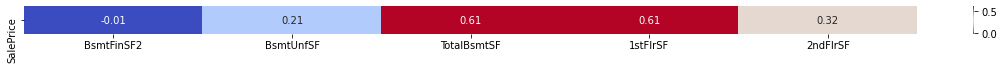

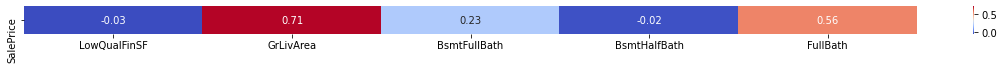

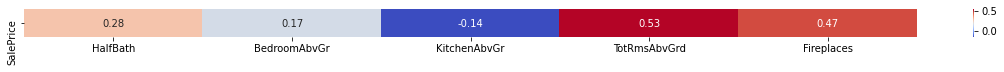

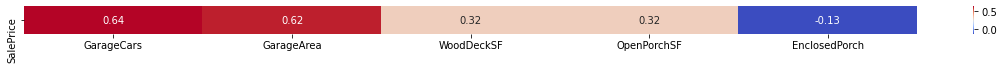

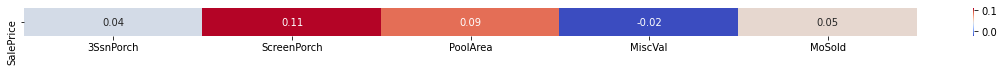

In [352]:
from math import ceil
correlation_matrix = lf.corr().round(2)
matrix = correlation_matrix.loc[["SalePrice"]]
for x in range(ceil((len(df.columns)-5)/5)):
    plt.figure(x,figsize = (20,.5))
    sns.heatmap(data=matrix.iloc[:,x*5:min(len(df),(x+1)*5)], cmap="coolwarm",annot=True)




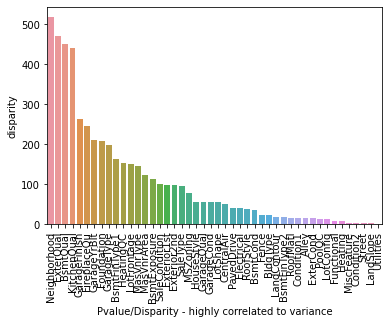

In [102]:
#The F-Statistic: Variation Between Sample Means / Variation Within the Samples. 
#The F value in one way ANOVA is a tool to help you answer the question “Is the variance between the means of two populations significantly different?” The F value in the ANOVA test also determines the P value; The P value is the probability of getting a result at least as extreme as the one that was actually observed, given that the null hypothesis is true.
#the lower the pvalue the less similar the two data types and an alternative hypothesis applies because the probability of getting that mean with the null hypothesis is super low
#https://pygot.wordpress.com/2018/06/28/hypothesis-testing-in-python/

#small pvalue --> different hypothesis or class of values --> greater disparity
#high variance --> small pvalue --> small probability of sample mean with null hypothesis because there is so much variance between data 

qualitatives = df.select_dtypes("object").columns
pvals = pd.DataFrame(columns=["pval"])
for col in qualitatives:
    samples = [x[1]["SalePrice"].values for x in df.groupby(col)]
    pvals.loc[col] = [stats.f_oneway(*samples)[1]]
pvals = pvals.reset_index().sort_values("pval")
pvals['disparity'] = np.log(1./pvals['pval'].values)
sns.barplot(data=pvals, x='index', y='disparity')
x=plt.xticks(rotation=90)
x=plt.xlabel("Pvalue/Disparity - highly correlated to variance")

In [ ]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

In [89]:
samples = [x[1]["SalePrice"].values for x in df.groupby("Utilities")]
stats.f_oneway(*samples)

F_onewayResult(statistic=0.29880407484898486, pvalue=0.5847167739689381)

In [354]:
print("Best Fourth:",np.quantile(correlation_matrix["SalePrice"], .75))
correlation_matrix.SalePrice.loc[correlation_matrix["SalePrice"]>.51].index

Best Fourth: 0.51


Index(['SalePrice', 'LotFrontage', 'Neighborhood', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


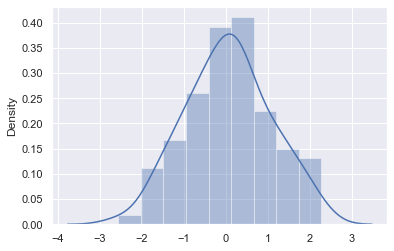

In [377]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

In [117]:
kf = pd.DataFrame({'A': ['a','b','b','c','a'],
                   'B': [1,2,3,5,2],
                   'C': [1,2,2,2,2]})

pd.melt(kf, id_vars=['A'], value_vars=['B','C']) #for each of the value vars stacked on top of eachother, is a dataframe with the A value and variable and variable value

,A,variable,value
0,a,B,1
1,b,B,2
2,b,B,3
3,c,B,5
4,a,B,2
5,a,C,1
6,b,C,2
7,b,C,2
8,c,C,2
9,a,C,2


In [ ]:
sns.barplot(x=['a','a','b','b'], y=[1,2,3,4])

In [137]:
#df.loc[:,"SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [336]:
pd.concat([pd.DataFrame([[1,2,3],[1,2,3]]),pd.DataFrame([[1,2,3],[1,2,3]])],axis=1)

,0,1,2,0,1,2
0,1,2,3,1,2,3
1,1,2,3,1,2,3


In [408]:
pd.DataFrame([[1,2,3],[2,2,3],[np.nan,5]]).groupby(0)[1].mean()

0
1.0    2
2.0    2
Name: 1, dtype: int64